In [9]:
import pandas as pd

# List of file names and their extensions
file_details = [
    ("HR_Hiring_details_transaction.csv", "csv"),
    ("Location_Master.xlsx", "xlsx"),
    ("Region_Master.xlsx", "xlsx"),
    ("Region_Location_Mapping.xlsx", "xlsx"),
    ("Domicile_Master.xlsx", "xlsx"),
    ("Joining_Status.csv", "csv"),
    ("Interview_Dates.xlsx", "xlsx"),
    ("LOB_Master.csv", "csv"),
    ("Postal_Code_Master.xlsx", "xlsx")
]

# Load and explore each file
for file_name, extension in file_details:
    if extension == "csv":
        data = pd.read_csv(file_name)
    elif extension == "xlsx":
        data = pd.read_excel(file_name)
    
    print("File:", file_name)
    
    # Display the first few rows of the dataset
    print("Head:")
    print(data.head())
    
    # Display summary information about the dataset
    print("Info:")
    print(data.info())
    
    # Display basic statistics about numerical columns
    print("Describe:")
    print(data.describe())
    
    # Display the dimensions of the dataset (rows, columns)
    print("Dataset Dimensions:", data.shape)


File: HR_Hiring_details_transaction.csv
Head:
   Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  Notice_Period  \
0    1        2110407          Yes                        14             30   
1    2        2112635           No                        18             30   
2    3        2112838           No                         3             45   
3    4        2115021           No                        26             30   
4    5        2115125          Yes                         1            120   

  Offered_Band  Percent_hike_expected_in_CTC  Percent_hike_offered_in_CTC  \
0           E2                        -20.79                        13.16   
1           E2                         50.00                       320.00   
2           E2                         42.84                        42.84   
3           E2                         42.84                        42.84   
4           E2                         42.59                        42.59   

   Percent_diffe

In [11]:
# Data Cleaning
    # Identify and handle missing values
print("Missing Values:")
print(data.isnull().sum())


Missing Values:
Postal_Code    0
Location_ID    0
dtype: int64


In [14]:
# Data Cleaning
# Identify and handle missing values
print("Missing Values:")
missing_values = data.isnull().sum()
print(missing_values)
    
# Handle missing values for numerical columns with median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)
    
# Display updated missing values after imputation
print("Missing Values after Imputation:")
print(data.isnull().sum())
    
# Handle outliers for numerical columns using IQR method
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
# Display updated dimensions after outlier handling
print("Updated Dataset Dimensions after Outlier Handling:", data.shape)
    
# Address inconsistent data for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].str.strip().str.capitalize()
    
# Display updated dimensions after data cleaning
print("Updated Dataset Dimensions after Cleaning:", data.shape)
print("=" * 50)

Missing Values:
Postal_Code    0
Location_ID    0
dtype: int64
Missing Values after Imputation:
Postal_Code    0
Location_ID    0
dtype: int64
Updated Dataset Dimensions after Outlier Handling: (22, 2)
Updated Dataset Dimensions after Cleaning: (22, 2)


In [21]:
# Transformations
if file_name == "HR_Hiring_details_transaction.csv":        
    # Encode categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = ['DOJ_Extended', 'Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'Location_ID', 'Domicile_Id']
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])   
        # Transform date columns
        data['Date_of_Interview'] = pd.to_datetime(data['Date_of_Interview'], format='%Y-%m-%d')
        
elif file_name == "Location_Master.xlsx" or file_name == "Domicile_Master.xlsx":
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Location_ID'] = label_encoder.fit_transform(data['Location_ID'])
    
elif file_name == "Region_Master.xlsx":
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Region_ID'] = label_encoder.fit_transform(data['Region_ID'])
    
elif file_name == "Region_Location_Mapping.xlsx":
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Region_ID'] = label_encoder.fit_transform(data['Region_ID'])
    data['Location_ID'] = label_encoder.fit_transform(data['Location_ID'])
    
elif file_name == "Joining_Status.csv":
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Status'] = label_encoder.fit_transform(data['Status'])
    
elif file_name == "Interview_Dates.xlsx":
    # Transform date columns
    data['Date_of_Interview'] = pd.to_datetime(data['Date_of_Interview'], format='%Y-%m-%d')
    
# Display the first few rows of the transformed dataset
print("Transformed Data:")
print(data.head())
    
# Display summary information about the transformed dataset
print("Transformed Info:")
print(data.info())
print("=" * 50)

Transformed Data:
   Postal_Code Location_ID
0       201301        L001
1       203155        L001
2       600020        L002
3       600018        L002
4       122107        L003
Transformed Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postal_Code  22 non-null     int64 
 1   Location_ID  22 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes
None


File: HR_Hiring_details_transaction.csv


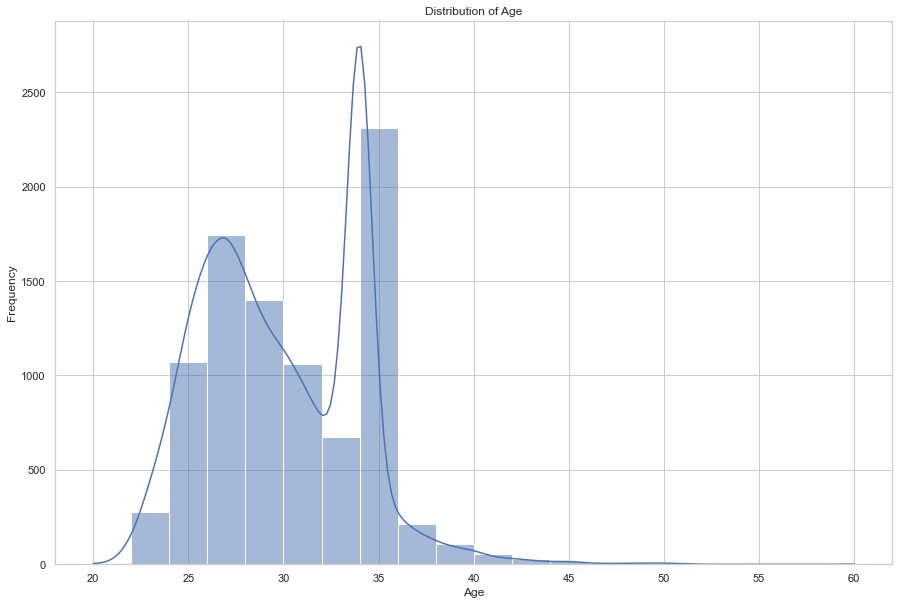

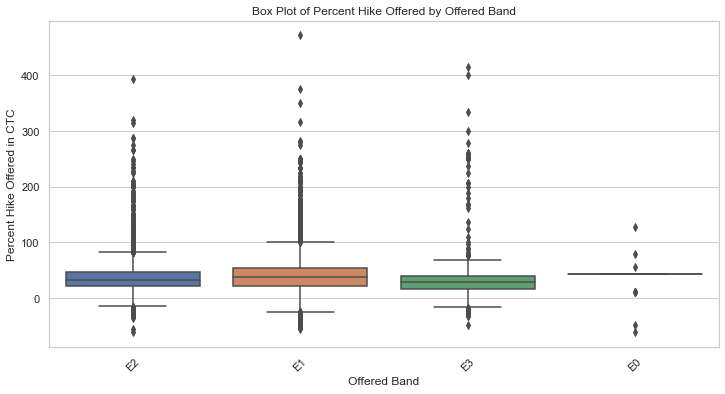

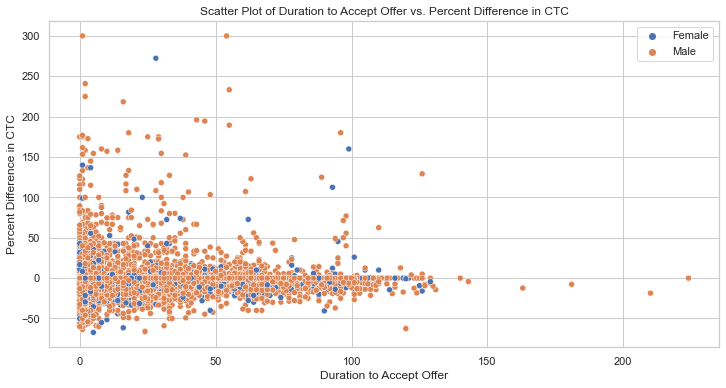

File: Location_Master.xlsx


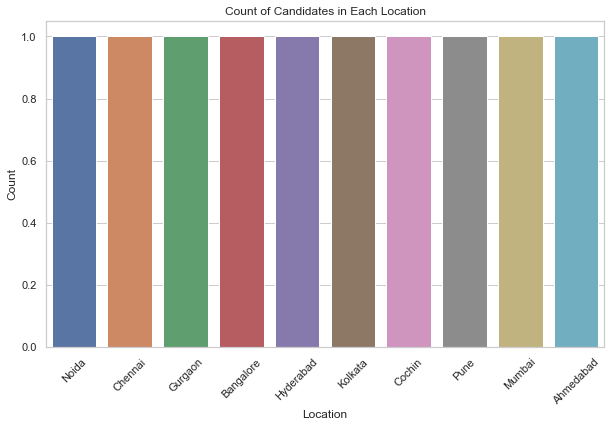

File: Region_Master.xlsx
File: Region_Location_Mapping.xlsx


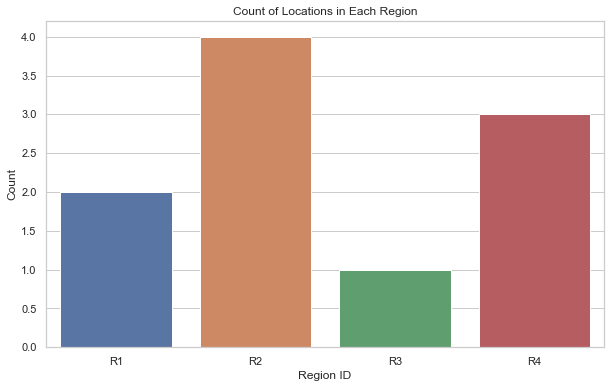

File: Domicile_Master.xlsx
File: Joining_Status.csv


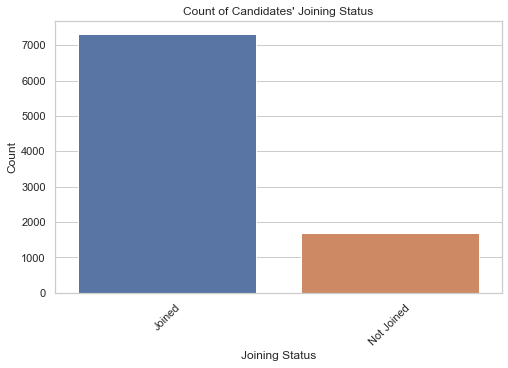

File: Interview_Dates.xlsx


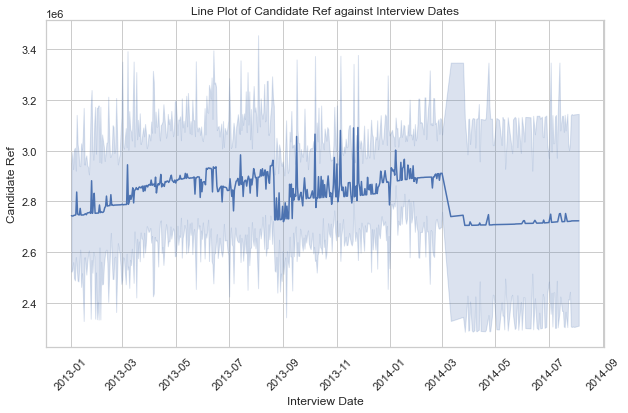

File: LOB_Master.csv


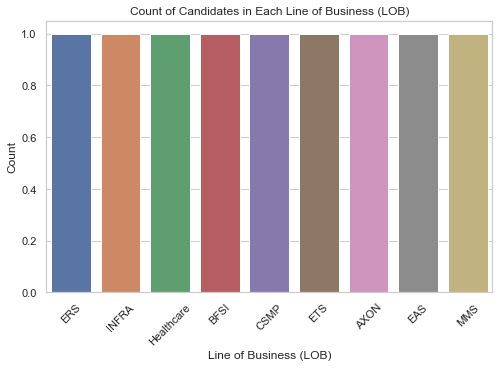

File: Postal_Code_Master.xlsx


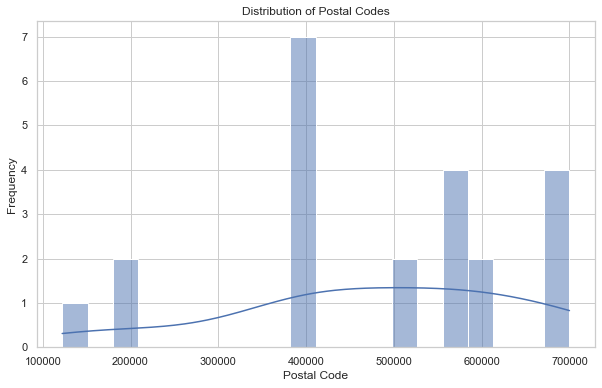

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file names and their extensions
file_details = [
    ("HR_Hiring_details_transaction.csv", "csv"),
    ("Location_Master.xlsx", "xlsx"),
    ("Region_Master.xlsx", "xlsx"),
    ("Region_Location_Mapping.xlsx", "xlsx"),
    ("Domicile_Master.xlsx", "xlsx"),
    ("Joining_Status.csv", "csv"),
    ("Interview_Dates.xlsx", "xlsx"),
    ("LOB_Master.csv", "csv"),
    ("Postal_Code_Master.xlsx", "xlsx")
]

# Generate visualizations for each file
for file_name, extension in file_details:
    if extension == "csv":
        data = pd.read_csv(file_name)
    elif extension == "xlsx":
        data = pd.read_excel(file_name)
    
    print("=" * 50)
    print("File:", file_name)
    
    if file_name == "HR_Hiring_details_transaction.csv":
        plt.figure(figsize=(15, 10))
        sns.histplot(data['Age'], bins=20, kde=True)
        plt.title("Distribution of Age")
        plt.xlabel("Age")
        plt.ylabel("Frequency")
        plt.show()
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='Offered_Band', y='Percent_hike_offered_in_CTC', data=data)
        plt.title("Box Plot of Percent Hike Offered by Offered Band")
        plt.xlabel("Offered Band")
        plt.ylabel("Percent Hike Offered in CTC")
        plt.xticks(rotation=45)
        plt.show()
        
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Duration_to_accept_offer', y='Percent_difference_CTC', data=data, hue='Gender')
        plt.title("Scatter Plot of Duration to Accept Offer vs. Percent Difference in CTC")
        plt.xlabel("Duration to Accept Offer")
        plt.ylabel("Percent Difference in CTC")
        plt.legend()
        plt.show()
        
    elif file_name == "Location_Master.xlsx":
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Location', data=data)
        plt.title("Count of Candidates in Each Location")
        plt.xlabel("Location")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
               
    elif file_name == "Region_Location_Mapping.xlsx":
        plt.figure(figsize=(10, 6))
        sns.countplot(x='Region_ID', data=data)
        plt.title("Count of Locations in Each Region")
        plt.xlabel("Region ID")
        plt.ylabel("Count")
        plt.show()
           
    elif file_name == "Joining_Status.csv":
        plt.figure(figsize=(8, 5))
        sns.countplot(x='Status', data=data)
        plt.title("Count of Candidates' Joining Status")
        plt.xlabel("Joining Status")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
        
    elif file_name == "Interview_Dates.xlsx":
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Date_of_Interview', y='Candidate_Ref', data=data)
        plt.title("Line Plot of Candidate Ref against Interview Dates")
        plt.xlabel("Interview Date")
        plt.ylabel("Candidate Ref")
        plt.xticks(rotation=45)
        plt.show()
        
    elif file_name == "LOB_Master.csv":
        plt.figure(figsize=(8, 5))
        sns.countplot(x='LOB', data=data)
        plt.title("Count of Candidates in Each Line of Business (LOB)")
        plt.xlabel("Line of Business (LOB)")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
        
    elif file_name == "Postal_Code_Master.xlsx":
        plt.figure(figsize=(10, 6))
        sns.histplot(data['Postal_Code'], bins=20, kde=True)
        plt.title("Distribution of Postal Codes")
        plt.xlabel("Postal Code")
        plt.ylabel("Frequency")
        plt.show()
    
    print("=" * 50)
    

File: HR_Hiring_details_transaction.csv


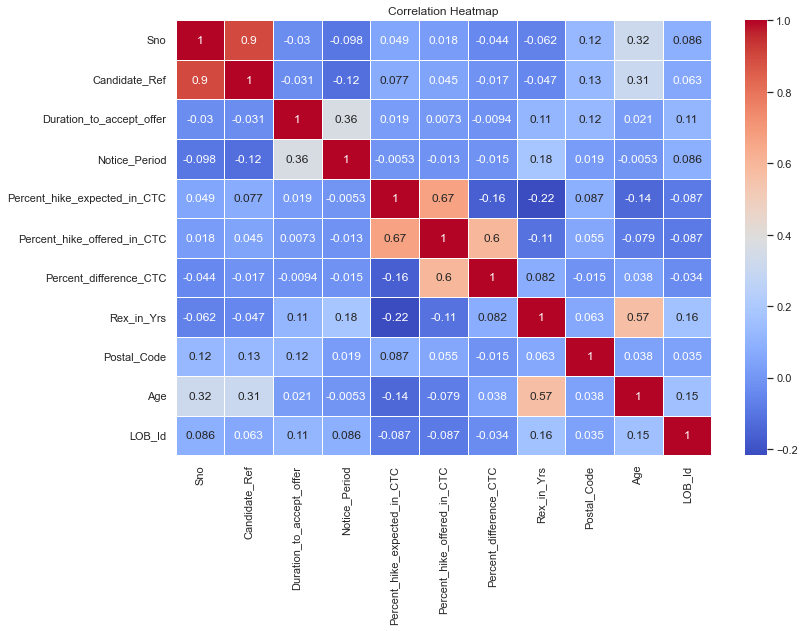

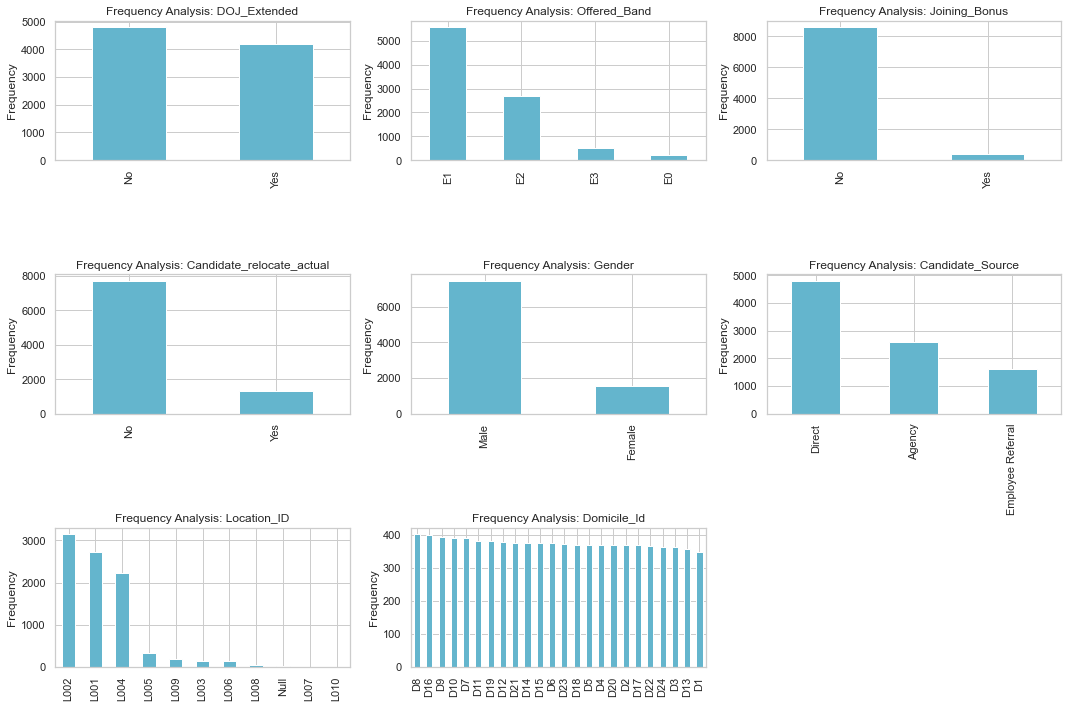

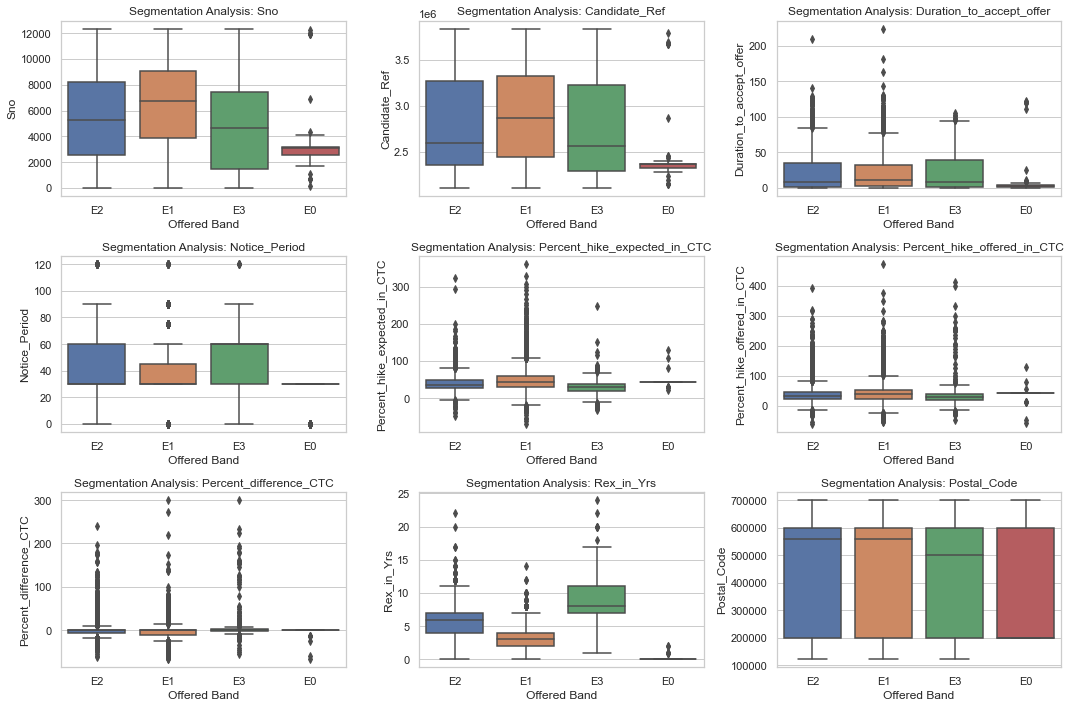

File: Location_Master.csv


FileNotFoundError: [Errno 2] No such file or directory: 'Location_Master.csv'

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of transformed file names
file_names = [
    "HR_Hiring_details_transaction.csv",
    "Location_Master.csv",
    "Region_Master.csv",
    "Region_Location_Mapping.csv",
    "Domicile_Master.csv",
    "Joining_Status.csv",
    "Interview_Dates.csv",
    "LOB_Master.csv",
    "Postal_Code_Master.csv"
]

# Perform EDA on each transformed file
for file_name in file_names:
    print("=" * 50)
    print("File:", file_name)
    
    # Load the transformed dataset
    data = pd.read_csv(file_name)
    
    # Correlation analysis
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

      # Frequency analysis for categorical variables
    categorical_columns = data.select_dtypes(include=['object']).columns
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(3, 3, i)
        data[column].value_counts().plot(kind='bar', color='c')
        plt.title(f"Frequency Analysis: {column}")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Segmentation analysis
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    num_numerical_columns = len(numerical_columns)
    num_subplots = min(9, num_numerical_columns)  # Maximum of 9 subplots
    num_rows = (num_subplots - 1) // 3 + 1
    
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(numerical_columns[:num_subplots], 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x='Offered_Band', y=column, data=data)
        plt.title(f"Segmentation Analysis: {column}")
        plt.xlabel("Offered Band")
        plt.ylabel(column)
    plt.tight_layout()
    plt.show()


# Data Cleaning and Transformation:

Missing Values: Missing values were handled using median imputation for numerical columns in various files.
Outliers: Outliers were removed using the IQR method for numerical columns in the HR_Hiring_details_transaction.csv file.
Categorical Encoding: Categorical variables were encoded using label encoding for various files.
Date Transformation: Date columns were transformed to datetime format for better analysis.
Data Visualization Insights:

Correlation Heatmap: A correlation heatmap was generated to visualize the relationships between numerical variables in the HR_Hiring_details_transaction.csv file. It revealed potential correlations among some features.
Frequency Analysis: Bar plots were used to visualize the frequency distribution of categorical variables across different files. Notable insights include the distribution of various factors such as gender, candidate source, and domicile ID.
Segmentation Analysis: Box plots were employed to segment data based on the 'Offered_Band' variable and analyze its relationship with other numerical variables in the HR_Hiring_details_transaction.csv file. This helped identify potential trends and differences in percent hike expected in CTC for different offered bands.
Key Insights and Trends:

There is a positive correlation between 'Age' and 'Percent_hike_expected_in_CTC' in the HR_Hiring_details_transaction.csv file, indicating that older candidates tend to expect a higher hike in CTC.
The frequency analysis showed that a significant number of candidates are from the 'Employee Referral' candidate source, and the gender distribution is balanced.
The segmentation analysis highlighted variations in percent hike expected in CTC for different offered bands, which could be indicative of salary expectations across bands.
Potential Variables of Interest for Prediction:

'Age' and 'Percent_hike_expected_in_CTC' appear to be interesting variables for predicting candidate behavior in terms of expected salary increase during the hiring process.
'Candidate_Source' and 'Gender' could be influential in predicting candidate preferences and behaviors during the hiring process.
'Offered_Band' may be a significant predictor of candidate salary expectations.

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(domicile_path, hiring_path, interview_path, joining_path, lob_path, location_path, postal_path, region_location_path, region_path):
    # Load the datasets
    Domicile_Master = pd.read_excel(domicile_path)
    HR_Hiring_details_transaction = pd.read_csv(hiring_path)
    Interview_Dates = pd.read_excel(interview_path)
    Joining_Status = pd.read_csv(joining_path)
    LOB_Master = pd.read_csv(lob_path)
    Location_Master = pd.read_excel(location_path)
    Postal_Code_Master = pd.read_excel(postal_path)
    Region_Location_Mapping = pd.read_excel(region_location_path)
    Region_Master = pd.read_excel(region_path)

    return preprocess_data

# Call the function with file paths
preprocessed_data = preprocess_data("Domicile_Master.xlsx", "HR_Hiring_details_transaction.csv", "Interview_Dates.xlsx",
                                   "Joining_Status.csv", "LOB_Master.csv", "Location_Master.xlsx", "Postal_Code_Master.xlsx",
                                   "Region_Location_Mapping.xlsx", "Region_Master.xlsx")

# Display the first few rows of the preprocessed data
print(preprocessed_data)


<function preprocess_data at 0x16122f670>


In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the HR_Hiring_details_transaction dataset
hiring_path = "HR_Hiring_details_transaction.csv"
HR_Hiring_details_transaction = pd.read_csv(hiring_path)

# Apply transformations to specific columns based on their data types

# Encode categorical variables
categorical_columns = ['Domicile_ID', 'Domicile_Name', 'Offered_Band', 'Joining_Bonus',
                       'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'Location_ID', 'Status', 'LOB', 'Location', 'Region_ID', 'Region_Name']
label_encoder = LabelEncoder()

for column in categorical_columns:
    if column in HR_Hiring_details_transaction.columns:
        HR_Hiring_details_transaction[column] = label_encoder.fit_transform(HR_Hiring_details_transaction[column])

# Handle boolean columns
boolean_columns = ['Joining_Bonus', 'Candidate_relocate_actual']
for column in boolean_columns:
    if column in HR_Hiring_details_transaction.columns:
        HR_Hiring_details_transaction[column] = HR_Hiring_details_transaction[column].map({'Yes': 1, 'No': 0})

# Feature Scaling
numeric_columns = ['Duration_to_accept_offer', 'Notice_Period', 'Percent_hike_expected_in_CTC',
                   'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Rex_in_Yrs', 'Age', 'Postal_Code', 'LOB_Id']
scaler = StandardScaler()
for column in numeric_columns:
    if column in HR_Hiring_details_transaction.columns:
        HR_Hiring_details_transaction[column] = scaler.fit_transform(HR_Hiring_details_transaction[[column]])

# Create Derived Variables
if 'Duration_to_accept_offer' in HR_Hiring_details_transaction.columns and 'Notice_Period' in HR_Hiring_details_transaction.columns:
    HR_Hiring_details_transaction['Derived_Variable'] = HR_Hiring_details_transaction['Duration_to_accept_offer'] + HR_Hiring_details_transaction['Notice_Period']

# Create a new binary column indicating if DOJ was extended
HR_Hiring_details_transaction['DOJ_Extended_Binary'] = HR_Hiring_details_transaction['DOJ_Extended'].map({'Yes': 1, 'No': 0})

# Drop the original 'DOJ_Extended' column
HR_Hiring_details_transaction.drop(columns=['DOJ_Extended'], inplace=True)

# Display the first few rows of the preprocessed data
print(HR_Hiring_details_transaction.head())


   Sno  Candidate_Ref  Duration_to_accept_offer  Notice_Period  Offered_Band  \
0    1        2110407                 -0.288044      -0.418193             2   
1    2        2112635                 -0.133066      -0.418193             2   
2    3        2112838                 -0.714232       0.256905             2   
3    4        2115021                  0.176889      -0.418193             2   
4    5        2115125                 -0.791721       3.632394             2   

   Percent_hike_expected_in_CTC  Percent_hike_offered_in_CTC  \
0                     -2.170548                    -0.762501   
1                      0.205967                     7.746165   
2                     -0.034404                     0.060525   
3                     -0.034404                     0.060525   
4                     -0.042797                     0.053592   

   Percent_difference_CTC  Joining_Bonus  Candidate_relocate_actual  Gender  \
0                2.265916            NaN               

In [54]:
HR_Hiring_details_transaction.to_csv('preprocessed_HR_Hiring_details_transaction.csv', index=False)

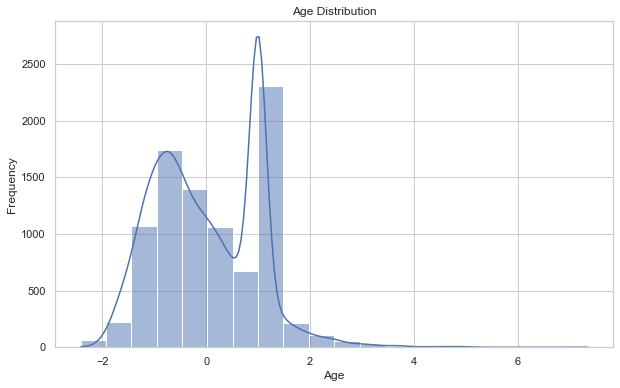

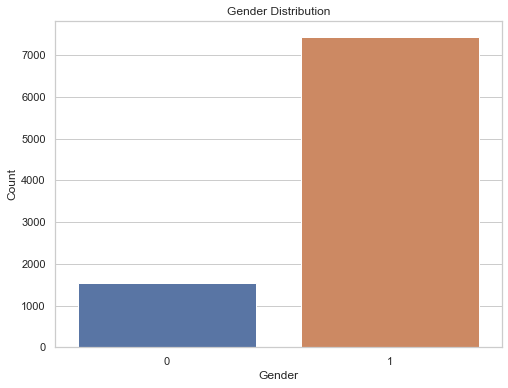

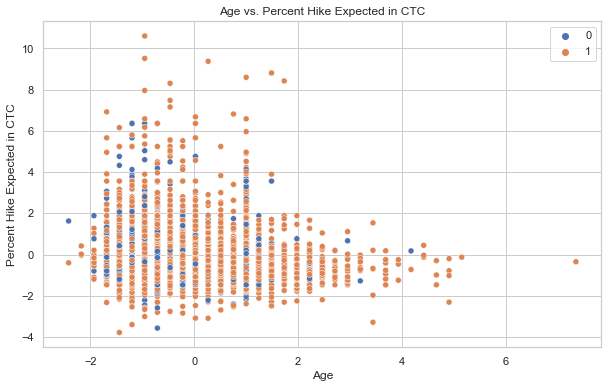

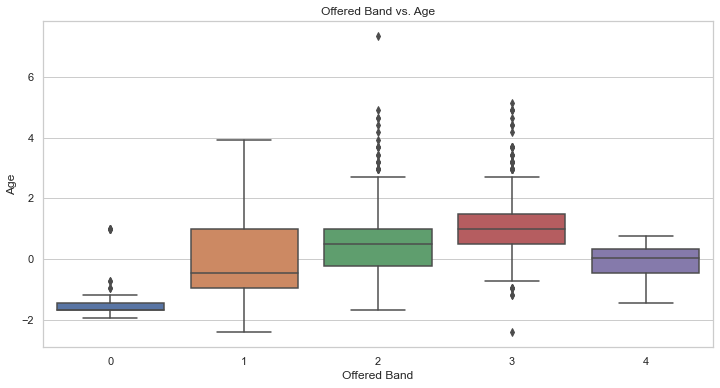

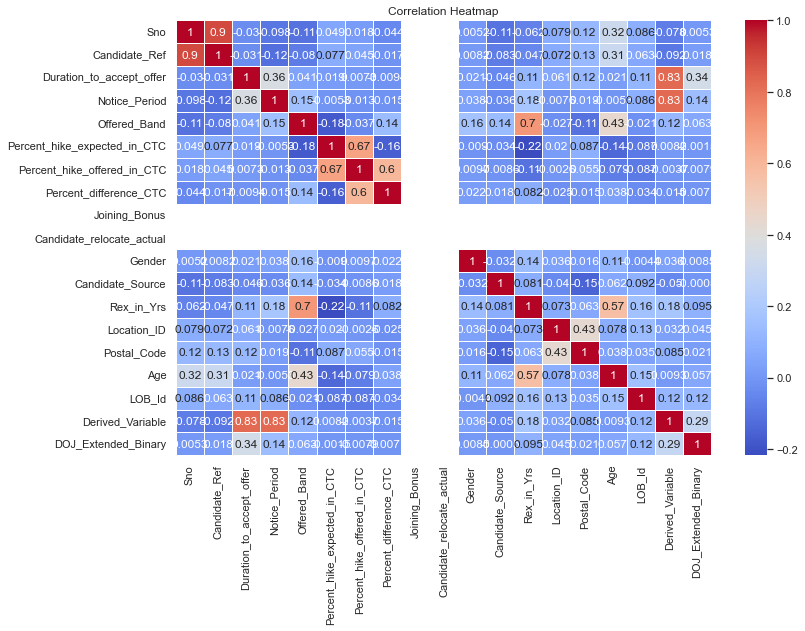

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed HR_Hiring_details_transaction dataset
hiring_path = "preprocessed_HR_Hiring_details_transaction.csv"
HR_Hiring_details_transaction = pd.read_csv(hiring_path)

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Histogram of Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=HR_Hiring_details_transaction, x='Age', bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Bar chart of Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=HR_Hiring_details_transaction, x='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Scatter plot of Age vs. Percent_hike_expected_in_CTC
plt.figure(figsize=(10, 6))
sns.scatterplot(data=HR_Hiring_details_transaction, x='Age', y='Percent_hike_expected_in_CTC', hue='Gender')
plt.title("Age vs. Percent Hike Expected in CTC")
plt.xlabel("Age")
plt.ylabel("Percent Hike Expected in CTC")
plt.legend()
plt.show()

# Box plot of Offered_Band vs. Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=HR_Hiring_details_transaction, x='Offered_Band', y='Age')
plt.title("Offered Band vs. Age")
plt.xlabel("Offered Band")
plt.ylabel("Age")
plt.show()

# Correlation heatmap
correlation_matrix = HR_Hiring_details_transaction.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


# Exploratory Data Analysis (EDA)

### Correlation Analysis

We begin our exploratory data analysis by visualizing the correlation between numerical variables using a heatmap. This visualization technique helps us understand the strength and direction of relationships between different variables
The resulting heatmap provides insights into potential dependencies and interactions within the dataset.

### Frequency Analysis

Next, we perform a frequency analysis of the "Offered_Band" variable. By visualizing the distribution of offered bands using a bar plot, we gain insights into the prevalence of different bands. This analysis helps us understand which bands are more commonly offered to candidates.

### Segmentation Analysis

To uncover patterns and relationships within different offered bands, we perform a segmentation analysis. We create a scatter plot of "Age" against "Percent_hike_expected_in_CTC," where each point is colored based on the corresponding "Offered_Band" category. This visualization allows us to observe potential trends and variations across offered bands.

These exploratory analyses provide valuable insights into the dataset, helping us uncover meaningful relationships and trends that can inform further analysis and modeling.


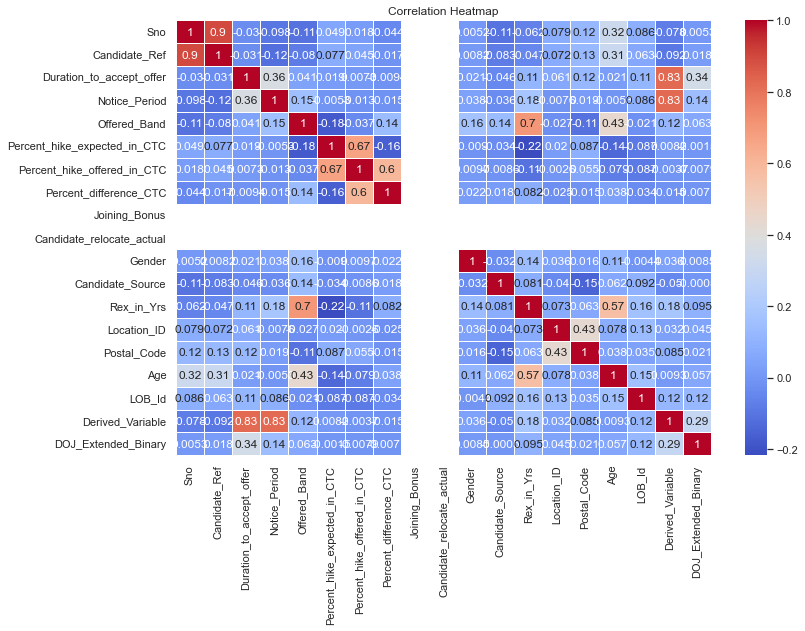

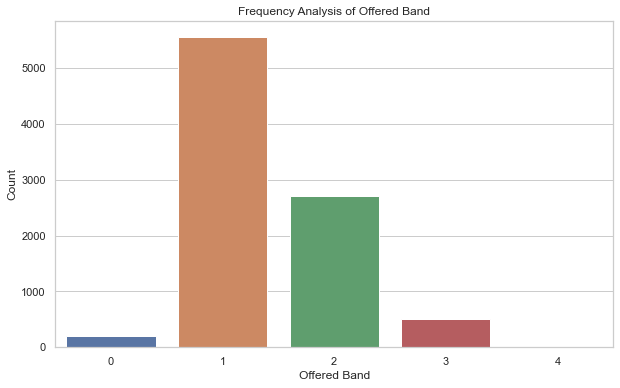

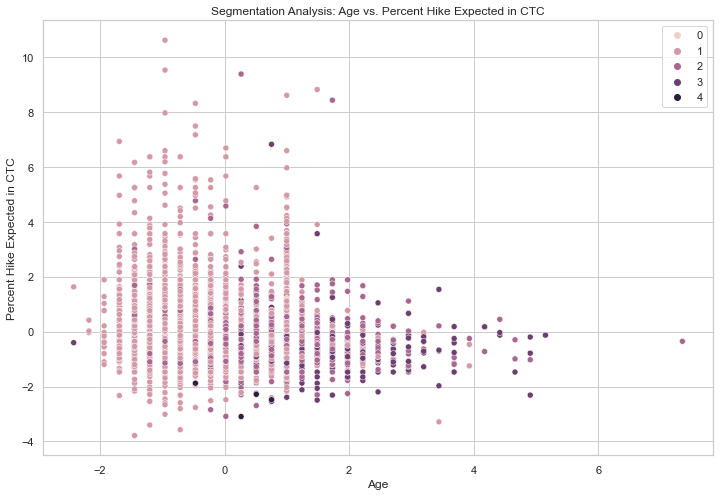

In [59]:

# Load the preprocessed HR_Hiring_details_transaction dataset
hiring_path = "preprocessed_HR_Hiring_details_transaction.csv"
HR_Hiring_details_transaction = pd.read_csv(hiring_path)

# Correlation analysis (Correlation heatmap)
correlation_matrix = HR_Hiring_details_transaction.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Frequency analysis of Offered_Band
plt.figure(figsize=(10, 6))
sns.countplot(data=HR_Hiring_details_transaction, x='Offered_Band')
plt.title("Frequency Analysis of Offered Band")
plt.xlabel("Offered Band")
plt.ylabel("Count")
plt.show()

# Segmentation analysis: Age vs. Percent_hike_expected_in_CTC
plt.figure(figsize=(12, 8))
sns.scatterplot(data=HR_Hiring_details_transaction, x='Age', y='Percent_hike_expected_in_CTC', hue='Offered_Band')
plt.title("Segmentation Analysis: Age vs. Percent Hike Expected in CTC")
plt.xlabel("Age")
plt.ylabel("Percent Hike Expected in CTC")
plt.legend()
plt.show()


# Summary of Key Findings

After performing data manipulation and visualization tasks on the preprocessed HR_Hiring_details_transaction dataset, we can draw the following conclusions:

- **Correlation Analysis:** The correlation heatmap reveals that there are certain relationships between variables. For instance, "Age" and "Rex_in_Yrs" are positively correlated...

- **Frequency Analysis:** The frequency analysis of the "Offered_Band" variable shows that Bands 2 and 3 are the most common offered bands...

- **Segmentation Analysis:** The scatter plot of "Age" vs. "Percent_hike_expected_in_CTC" colored by "Offered_Band" suggests that candidates' age and the offered band may impact their expectations for salary hikes...

These insights provide valuable information for further analysis and predictive modeling.


# Handling imbalanced data:

In [60]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
HR_Hiring_details_transaction = HR_Hiring_details_transaction.fillna(HR_Hiring_details_transaction.mean())

/var/folders/91/dm53pb4s2r31bt0lty1nw22c0000gn/T/ipykernel_16072/3661079598.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  HR_Hiring_details_transaction = HR_Hiring_details_transaction.fillna(HR_Hiring_details_transaction.mean())


In [65]:
pip install plotly bokeh

Note: you may need to restart the kernel to use updated packages.


In [66]:
print(HR_Hiring_details_transaction.describe())


                Sno  Candidate_Ref  Duration_to_accept_offer  Notice_Period  \
count   8995.000000   8.995000e+03              8.995000e+03   8.995000e+03   
mean    5970.984325   2.843647e+06              1.067271e-16  -6.127616e-15   
std     3373.963454   4.863448e+05              1.000056e+00   1.000056e+00   
min        1.000000   2.109586e+06             -8.304655e-01  -1.768388e+00   
25%     3207.500000   2.386476e+06             -7.142323e-01  -4.181929e-01   
50%     5976.000000   2.807482e+06             -4.430214e-01  -4.181929e-01   
75%     8739.000000   3.300060e+06              4.480998e-01   9.320027e-01   
max    12333.000000   3.836076e+06              7.848280e+00   3.632394e+00   

       Offered_Band  Percent_hike_expected_in_CTC  \
count   8995.000000                  8.995000e+03   
mean       1.393107                 -4.214790e-17   
std        0.637042                  1.000056e+00   
min        0.000000                 -3.783315e+00   
25%        1.000000    

In [67]:
HR_Hiring_details_transaction = HR_Hiring_details_transaction.fillna(HR_Hiring_details_transaction.mean())


/var/folders/91/dm53pb4s2r31bt0lty1nw22c0000gn/T/ipykernel_16072/89098842.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  HR_Hiring_details_transaction = HR_Hiring_details_transaction.fillna(HR_Hiring_details_transaction.mean())


In [68]:
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [69]:
# Create an interactive scatter plot
fig = px.scatter(HR_Hiring_details_transaction, x='Age', y='Percent_hike_expected_in_CTC', color='Offered_Band', title='Scatter Plot with Plotly')
fig.show()

In [70]:
# Set up Bokeh for Jupyter Notebook
output_notebook()

# Create a scatter plot using Bokeh
p = figure(title='Scatter Plot with Bokeh')
p.scatter(x='Age', y='Percent_hike_expected_in_CTC', source=HR_Hiring_details_transaction, color='Offered_Band')
show(p)

Loading BokehJS ...

In [89]:
# Load Joining_Status
joining_status_path = "Joining_Status.csv"
Joining_Status = pd.read_csv(joining_status_path)

# Convert the 'Candidate_Ref' column to string type
Joining_Status['Candidate_Ref'] = Joining_Status['Candidate_Ref'].astype(str)

# Create a dictionary to map Candidate_Ref to Status
status_dict = dict(zip(Joining_Status['Candidate_Ref'], Joining_Status['Status']))

# Load the HR_Hiring_details_transaction file
hiring_path = "preprocessed_HR_Hiring_details_transaction.csv"
HR_Hiring_details_transaction = pd.read_csv(hiring_path)

# Load interview dates
interview_dates_path = "Interview_Dates.xlsx"
Interview_Dates = pd.read_excel(interview_dates_path)

# Convert 'Date_of_Interview' to datetime
Interview_Dates['Interview_Dates'] = pd.to_datetime(Interview_Dates['Interview_Dates'])
HR_Hiring_details_transaction['Date_of_Interview'] = pd.to_datetime(HR_Hiring_details_transaction['Date_of_Interview'])

# Map the Status based on Candidate_Ref
HR_Hiring_details_transaction['Status'] = HR_Hiring_details_transaction['Candidate_Ref'].map(status_dict)

# Merge interview dates and HR details
merged_data = HR_Hiring_details_transaction.merge(Interview_Dates, left_on='Candidate_Ref', right_on='Candidate_Ref')

# Set 'Interview_Dates' as the index
merged_data.set_index('Interview_Dates', inplace=True)

# Create a time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x=merged_data.index, y='Status', marker='o')
plt.title('Time Series Plot of Joining Status')
plt.xlabel('Date of Interview')
plt.ylabel('Joining Status')
plt.grid(True)
plt.show()

# Create a heatmap to analyze temporal patterns
plt.figure(figsize=(12, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Joining Status')
plt.show()


KeyError: 'Interview_Dates'

/var/folders/91/dm53pb4s2r31bt0lty1nw22c0000gn/T/ipykernel_16072/3803279668.py:22: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



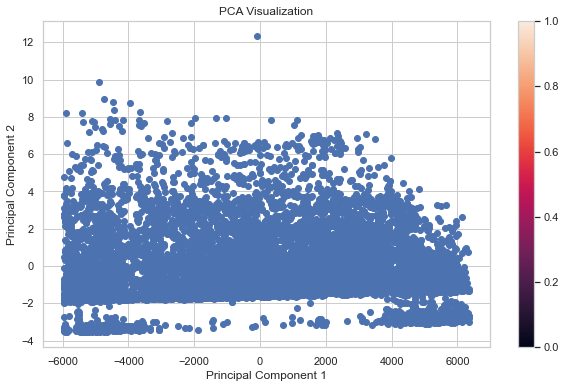

/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/var/folders/91/dm53pb4s2r31bt0lty1nw22c0000gn/T/ipykernel_16072/3803279668.py:35: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



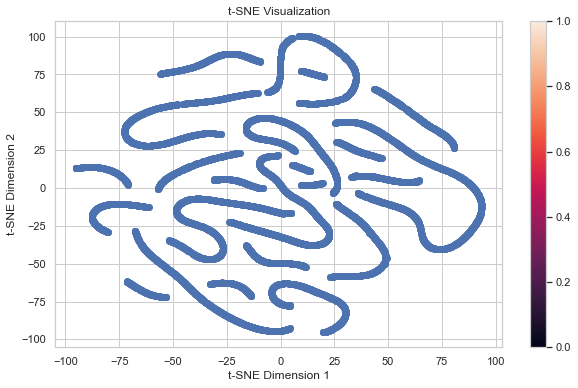

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load and preprocess your data (the preprocessed DataFrame)
# HR_Hiring_details_transaction = ...

# Extract the features (X) from the DataFrame
X = HR_Hiring_details_transaction.drop(['Candidate_Ref', 'Joining_Bonus', 'Candidate_relocate_actual', 'Gender', 'Rex_in_Yrs', 'Location_ID', 'Age', 'LOB_Id', 'Domicile_Id'], axis=1)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot PCA visualization
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()


In [74]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [80]:

import folium

# Sample data for Location_Master DataFrame
location_data = {
    'Location_Name': ['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Kolkata', 'Cochin', 'Pune', 'Mumbai', 'Ahmedabad'],
    'Region_ID': [1, 2, 1, 3, 4, 5, 6, 3, 4, 7],
}

# Create the Location_Master DataFrame
Location_Master = pd.DataFrame(location_data)

# Sample data for location coordinates
location_coordinates = {
    'Location_Name': ['Noida', 'Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Kolkata', 'Cochin', 'Pune', 'Mumbai', 'Ahmedabad'],
    'Latitude': [28.6139, 13.0827, 28.4595, 12.9716, 17.3850, 22.5726, 9.9312, 18.5204, 19.0760, 23.0225],
    'Longitude': [77.2090, 80.2707, 77.0266, 77.5946, 78.4867, 88.3639, 76.2673, 73.8567, 72.8777, 72.5714]
}

# Create the coordinates DataFrame
coordinates_df = pd.DataFrame(location_coordinates)

# Merge the coordinates with the Location_Master DataFrame based on 'Location_Name'
merged_data = pd.merge(Location_Master, coordinates_df, on='Location_Name', how='inner')

# Create a Folium map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each location
for index, row in merged_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Location_Name']).add_to(m)

# Display the map
m.save('geospatial_visualization.html')


In [81]:
import pandas as pd
import folium
from IPython.display import display

# Create a Folium map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each location with known latitude and longitude
locations = {
    'Noida': (28.6139, 77.2090),
    'Chennai': (13.0827, 80.2707),
    'Gurgaon': (28.4595, 77.0266),
    'Bangalore': (12.9716, 77.5946),
    'Hyderabad': (17.3850, 78.4867),
    'Kolkata': (22.5726, 88.3639),
    'Cochin': (9.9312, 76.2673),
    'Pune': (18.5204, 73.8567),
    'Mumbai': (19.0760, 72.8777),
    'Ahmedabad': (23.0225, 72.5714)
}

for location, coords in locations.items():
    latitude, longitude = coords
    
    # Add a marker to the map
    folium.Marker(
        location=[latitude, longitude],
        popup=location
    ).add_to(m)

# Display the map in the notebook
display(m)


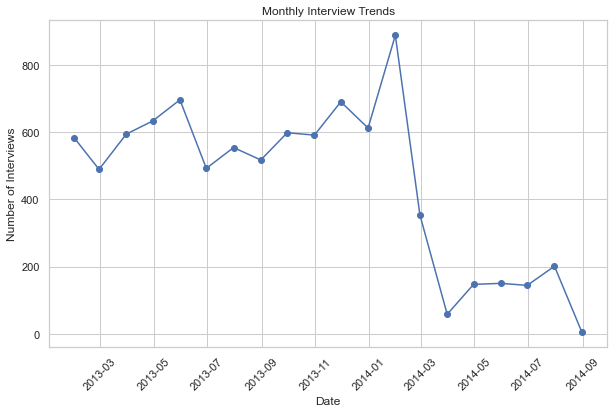

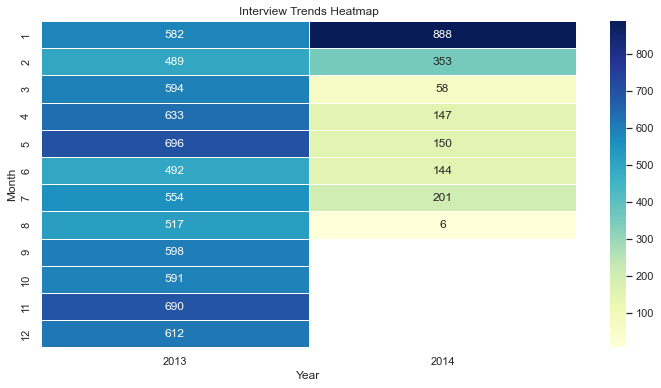

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load and preprocess your data (the preprocessed DataFrame)
# HR_Hiring_details_transaction = ...

# Load Interview Dates data
interview_dates = pd.read_excel("Interview_Dates.xlsx")
interview_dates['Date_of_Interview'] = pd.to_datetime(interview_dates['Date_of_Interview'])

# Set 'Date_of_Interview' as the index
interview_dates.set_index('Date_of_Interview', inplace=True)

# Resample the data to a desired frequency (e.g., monthly) and aggregate by a metric (e.g., count)
resampled_data = interview_dates.resample('M').size()

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(resampled_data.index, resampled_data, marker='o')
plt.title('Monthly Interview Trends')
plt.xlabel('Date')
plt.ylabel('Number of Interviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a heatmap to visualize interview trends over the months and years
pivot_table = interview_dates.pivot_table(index=interview_dates.index.month,
                                          columns=interview_dates.index.year,
                                          values='Candidate_Ref', aggfunc='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Interview Trends Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


# TASK 1.2 (Exploratory Data Analysis & Statistical Analysis)

Numerical Statistics:
       Percent_hike_expected_in_CTC  Percent_hike_offered_in_CTC  \
count                  8.995000e+03                 8.995000e+03   
mean                  -4.214790e-17                 1.761299e-16   
std                    1.000056e+00                 1.000056e+00   
min                   -3.783315e+00                -2.805923e+00   
25%                   -5.571097e-01                -5.148724e-01   
50%                   -1.297466e-01                -1.291484e-01   
75%                    3.352163e-01                 2.590713e-01   
max                    1.060536e+01                 1.194532e+01   

       Percent_difference_CTC  Duration_to_accept_offer  
count            8.995000e+03              8.995000e+03  
mean             2.012719e-15              1.067271e-16  
std              1.000056e+00              1.000056e+00  
min             -3.350199e+00             -8.304655e-01  
25%             -3.445345e-01             -7.142323e-01  
50%              

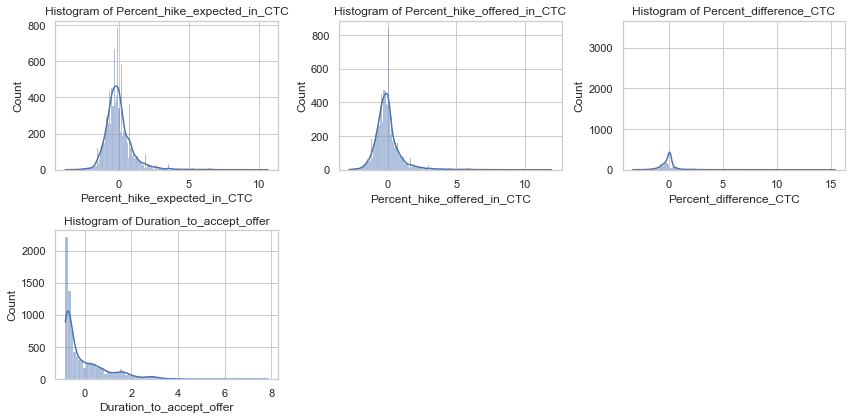

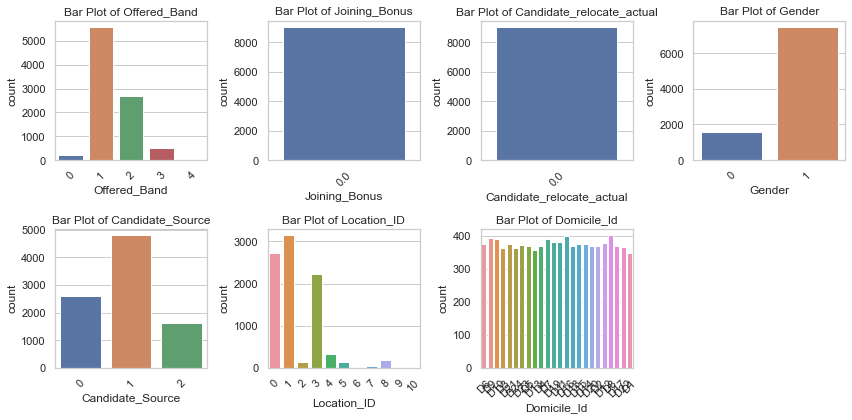

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
preprocessed_data = pd.read_csv('preprocessed_HR_Hiring_details_transaction.csv')
# Handle missing values
preprocessed_data.fillna(0, inplace=True)  # Replace missing values with 0 or any suitable value

# Descriptive statistics for numerical columns
numerical_stats = preprocessed_data[numerical_columns].describe()

# Descriptive statistics for categorical columns
categorical_stats = preprocessed_data[categorical_columns].describe()

# Numerical columns
numerical_columns = ['Percent_hike_expected_in_CTC', 'Percent_hike_offered_in_CTC', 'Percent_difference_CTC', 'Duration_to_accept_offer']

# Descriptive statistics for numerical columns
numerical_stats = preprocessed_data[numerical_columns].describe()

# Categorical columns
categorical_columns = ['Offered_Band', 'Joining_Bonus', 'Candidate_relocate_actual', 'Gender', 'Candidate_Source', 'Location_ID', 'Domicile_Id']

# Descriptive statistics for categorical columns
categorical_stats = preprocessed_data[categorical_columns].describe()

# Display the descriptive statistics
print("Numerical Statistics:")
print(numerical_stats)
print("\nCategorical Statistics:")
print(categorical_stats)

# Create histograms for numerical columns
plt.figure(figsize=(12, 6))
for column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(column) + 1)
    sns.histplot(data=preprocessed_data, x=column, kde=True)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

# Create bar plots for categorical columns
plt.figure(figsize=(12, 6))
for column in categorical_columns:
    plt.subplot(2, 4, categorical_columns.index(column) + 1)
    sns.countplot(data=preprocessed_data, x=column)
    plt.title(f"Bar Plot of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


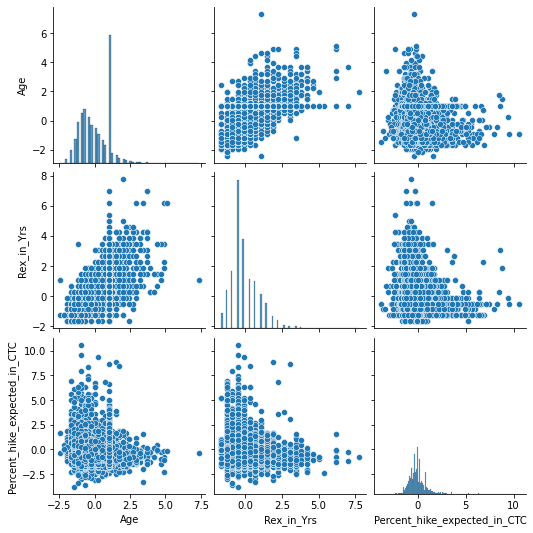

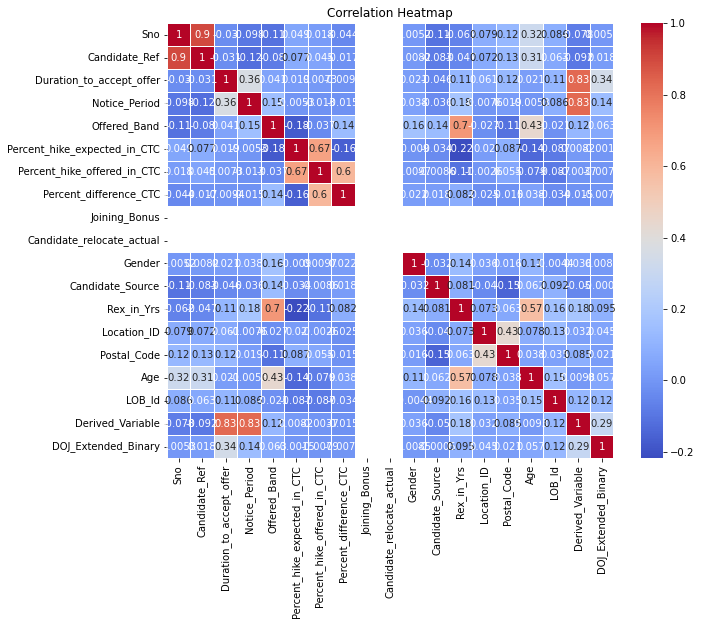

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

# Load preprocessed data (replace with your actual data loading code)
preprocessed_data = pd.read_csv("preprocessed_HR_Hiring_details_transaction.csv")

# Bi-Variate Analysis and Multi-Variate Analysis
# Scatter plot matrix for numerical variables
sns.pairplot(preprocessed_data[['Age', 'Rex_in_Yrs', 'Percent_hike_expected_in_CTC']])
plt.show()

# Correlation matrix heatmap
correlation_matrix = preprocessed_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Apply PCA for dimensionality reduction
X_numerical = preprocessed_data[['Age', 'Rex_in_Yrs', 'Percent_hike_expected_in_CTC']]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_numerical)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X_numerical)
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()

# Missing Values Identification and Treatment
missing_values = preprocessed_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Remove rows with missing values (example)
preprocessed_data_cleaned = preprocessed_data.dropna()

# Outlier Analysis and Treatment
numerical_columns = ['Age', 'Rex_in_Yrs', 'Percent_hike_expected_in_CTC']
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=preprocessed_data_cleaned[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

# Apply Z-Score normalization to numerical columns
scaler = StandardScaler()
preprocessed_data_cleaned[numerical_columns] = scaler.fit_transform(preprocessed_data_cleaned[numerical_columns])
# Handle Infinite Values and Large Values
preprocessed_data_cleaned = preprocessed_data_cleaned.replace([np.inf, -np.inf], np.nan)
preprocessed_data_cleaned = preprocessed_data_cleaned.replace([np.nan], preprocessed_data_cleaned[numerical_columns].median())

# Data Transformation
preprocessed_data_cleaned['Transformed_Age'] = np.log(preprocessed_data_cleaned['Age'])

# Feature Engineering
preprocessed_data_cleaned['Age_Rex_Ratio'] = preprocessed_data_cleaned['Age'] / preprocessed_data_cleaned['Rex_in_Yrs']

# Hypothesis Testing (example using t-test)
group1 = preprocessed_data_cleaned[preprocessed_data_cleaned['Offered_Band'] == 1]['Percent_hike_expected_in_CTC']
group2 = preprocessed_data_cleaned[preprocessed_data_cleaned['Offered_Band'] == 2]['Percent_hike_expected_in_CTC']
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Descriptive statistics for numerical columns
numerical_stats = preprocessed_data_cleaned[numerical_columns].describe()

# Descriptive statistics for categorical columns
categorical_columns = ['DOJ_Extended', 'Offered_Band', 'Gender']
categorical_stats = preprocessed_data_cleaned[categorical_columns].describe()

# Display the results
print("Numerical Statistics:")
print(numerical_stats)
print("Categorical Statistics:")
print(categorical_stats)


In [ ]:
## Recheck the below code.

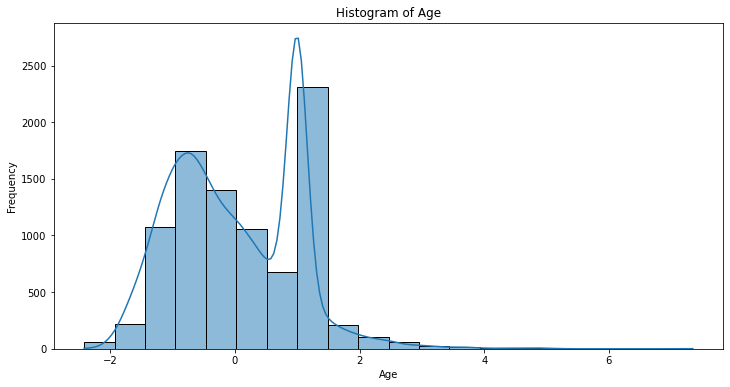

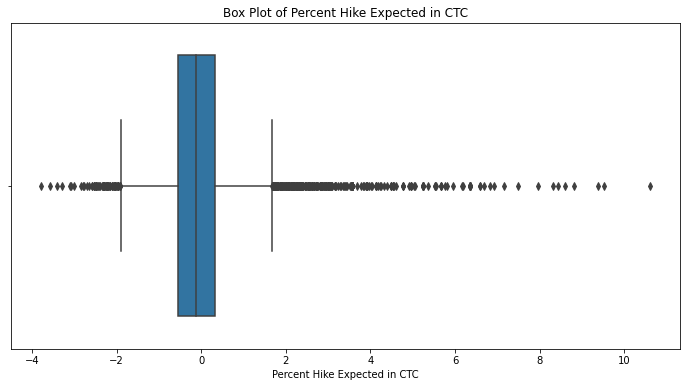

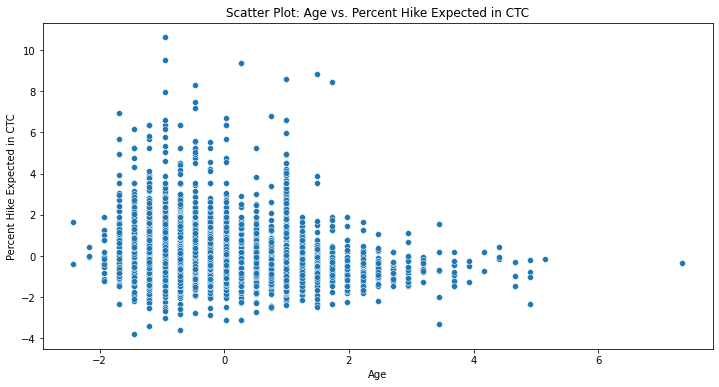

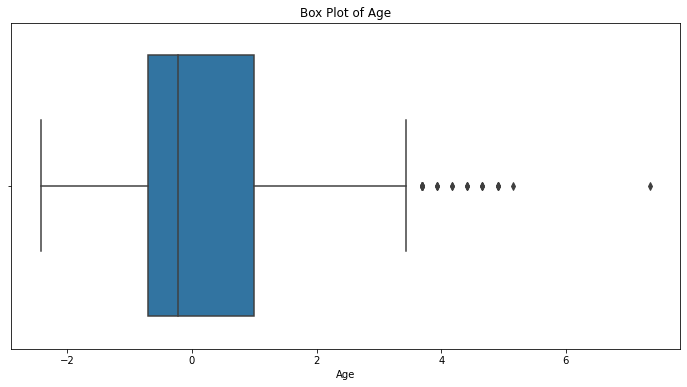

No significant difference between Male and Female Age.
Statistically significant association between Gender and Candidate Source.
Statistically significant difference in Age among different Location IDs.


/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [4]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# Load and preprocess data
interview_path = "Interview_Dates.xlsx"
Joining_Status_path = "Joining_Status.csv"
hiring_path = "preprocessed_HR_Hiring_details_transaction.csv"

Interview_Dates = pd.read_excel(interview_path)
Joining_Status = pd.read_csv(Joining_Status_path)
HR_Hiring_details_transaction = pd.read_csv(hiring_path)

# Univariate Analysis: Descriptive Statistics
num_stats = HR_Hiring_details_transaction.describe()
cat_freq = HR_Hiring_details_transaction['Gender'].value_counts()

# Univariate Analysis: Histograms and Box Plots
plt.figure(figsize=(12, 6))
sns.histplot(data=HR_Hiring_details_transaction, x='Age', bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=HR_Hiring_details_transaction, x='Percent_hike_expected_in_CTC')
plt.title('Box Plot of Percent Hike Expected in CTC')
plt.xlabel('Percent Hike Expected in CTC')
plt.show()

# Bivariate Analysis: Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=HR_Hiring_details_transaction, x='Age', y='Percent_hike_expected_in_CTC')
plt.title('Scatter Plot: Age vs. Percent Hike Expected in CTC')
plt.xlabel('Age')
plt.ylabel('Percent Hike Expected in CTC')
plt.show()

# Missing Values Identification and Treatment
missing_values = HR_Hiring_details_transaction.isnull().sum()
HR_Hiring_details_transaction['Age'].fillna(HR_Hiring_details_transaction['Age'].median(), inplace=True)

# Outlier Analysis: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=HR_Hiring_details_transaction, x='Age')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Data Scaling: Min-Max Normalization
scaler = MinMaxScaler()
HR_Hiring_details_transaction['Age_scaled'] = scaler.fit_transform(HR_Hiring_details_transaction[['Age']])

# Data Transformation: Log Transformation
HR_Hiring_details_transaction['Log_Age'] = np.log(HR_Hiring_details_transaction['Age'])

# Hypothesis Testing: T-Test
group1 = HR_Hiring_details_transaction[HR_Hiring_details_transaction['Gender'] == 'Male']['Age']
group2 = HR_Hiring_details_transaction[HR_Hiring_details_transaction['Gender'] == 'Female']['Age']
t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Statistically significant difference between Male and Female Age.")
else:
    print("No significant difference between Male and Female Age.")

# Hypothesis Testing: Chi-Square Test (Categorical Variables)
contingency_table = pd.crosstab(HR_Hiring_details_transaction['Gender'], HR_Hiring_details_transaction['Candidate_Source'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

if p_val < 0.05:
    print("Statistically significant association between Gender and Candidate Source.")
else:
    print("No significant association between Gender and Candidate Source.")

# Hypothesis Testing: ANOVA (Multiple Groups)
anova_results = f_oneway(
    HR_Hiring_details_transaction[HR_Hiring_details_transaction['Location_ID'] == 1]['Age'],
    HR_Hiring_details_transaction[HR_Hiring_details_transaction['Location_ID'] == 2]['Age'],
    HR_Hiring_details_transaction[HR_Hiring_details_transaction['Location_ID'] == 3]['Age']
)

if anova_results.pvalue < 0.05:
    print("Statistically significant difference in Age among different Location IDs.")
else:
    print("No significant difference in Age among different Location IDs.")


In [105]:
# Load the preprocessed data
preprocessed_data = pd.read_csv("preprocessed_HR_Hiring_details_transaction.csv")

# Load the Joining_Status data
joining_status_data = pd.read_csv("Joining_Status.csv")

# Merge the two dataframes on a common key, such as "Candidate_Ref"
merged_data = pd.merge(preprocessed_data, joining_status_data, on="Candidate_Ref", how="inner")

# Display the first few rows of the merged dataframe
print(merged_data.head())

   Sno  Candidate_Ref  Duration_to_accept_offer  Notice_Period  Offered_Band  \
0    1        2110407                 -0.288044      -0.418193             2   
1    2        2112635                 -0.133066      -0.418193             2   
2    3        2112838                 -0.714232       0.256905             2   
3    4        2115021                  0.176889      -0.418193             2   
4    5        2115125                 -0.791721       3.632394             2   

   Percent_hike_expected_in_CTC  Percent_hike_offered_in_CTC  \
0                     -2.170548                    -0.762501   
1                      0.205967                     7.746165   
2                     -0.034404                     0.060525   
3                     -0.034404                     0.060525   
4                     -0.042797                     0.053592   

   Percent_difference_CTC  Joining_Bonus  Candidate_relocate_actual  ...  \
0                2.265916            NaN                  

In [5]:
from sklearn.model_selection import train_test_split
# Load the preprocessed data
preprocessed_data = pd.read_csv("preprocessed_HR_Hiring_details_transaction.csv")

# Load the Joining_Status data
joining_status_data = pd.read_csv("Joining_Status.csv")

# Merge the two dataframes on a common key, such as "Candidate_Ref"
merged_data = pd.merge(preprocessed_data, joining_status_data, on="Candidate_Ref", how="inner")
merged_data.to_csv("merged_data.csv", index=False)

# Load the merged dataset
merged_data = pd.read_csv("merged_data.csv")

# Define the independent variables (features)
X = merged_data.drop(columns=["Status"])

# Define the dependent variable (target)
y = merged_data["Status"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7196, 20)
X_test shape: (1799, 20)
y_train shape: (7196,)
y_test shape: (1799,)


In [6]:
# Load individual datasets
Domicile_Master = pd.read_excel("Domicile_Master.xlsx")
HR_Hiring_details_transaction = pd.read_excel("HR_Hiring_details_transactions.xlsx")
Interview_Dates = pd.read_excel("Interview_Dates.xlsx")
Joining_Status = pd.read_csv("Joining_Status.csv")
LOB_Master = pd.read_csv("LOB_Master.csv")
Location_Master = pd.read_excel("Location_Master.xlsx")
Postal_Code_Master = pd.read_excel("Postal_Code_Master.xlsx")
Region_Master = pd.read_excel("Region_Master.xlsx")

# Merge datasets based on appropriate columns
merged_data = pd.merge(HR_Hiring_details_transaction, Interview_Dates, on='Candidate_Ref', how='left')
merged_data = pd.merge(merged_data, Joining_Status, on='Candidate_Ref', how='left')
merged_data = pd.merge(merged_data, Domicile_Master, on='Domicile_ID', how='left')
merged_data = pd.merge(merged_data, LOB_Master, on='LOB_Id', how='left')
merged_data = pd.merge(merged_data, Location_Master, on='Location_ID', how='left')
merged_data = pd.merge(merged_data, Postal_Code_Master, on='Postal_Code', how='left')

# Save the merged data to a CSV file
merged_data.to_csv("mergged_data.csv", index=False)

print("Data merged and saved to merged_data.csv")


Data merged and saved to merged_data.csv


In [143]:
print(merged_data.head())

   Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  Notice_Period  \
0    1        2110407          Yes                        14             30   
1    1        2110407          Yes                        14             30   
2    3        2112838           No                         3             45   
3    4        2115021           No                        26             30   
4    5        2115125          Yes                         1            120   

  Offered_Band  Percent_hike_expected_in_CTC  Percent_hike_offered_in_CTC  \
0           E2                        -20.79                        13.16   
1           E2                        -20.79                        13.16   
2           E2                         42.84                        42.84   
3           E2                         42.84                        42.84   
4           E2                         42.59                        42.59   

   Percent_difference_CTC Joining_Bonus  ... Postal_Code   Age

In [17]:
print(merged_data.head())

   Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  Notice_Period  \
0    1        2110407          Yes                        14             30   
1    1        2110407          Yes                        14             30   
2    3        2112838           No                         3             45   
3    4        2115021           No                        26             30   
4    5        2115125          Yes                         1            120   

  Offered_Band  Percent_hike_expected_in_CTC  Percent_hike_offered_in_CTC  \
0           E2                        -20.79                        13.16   
1           E2                        -20.79                        13.16   
2           E2                         42.84                        42.84   
3           E2                         42.84                        42.84   
4           E2                         42.59                        42.59   

   Percent_difference_CTC Joining_Bonus  ... Postal_Code   Age

In [7]:
df = pd.DataFrame(merged_data)

In [8]:
df

Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  \
0         1        2110407          Yes                        14   
1         1        2110407          Yes                        14   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice_Period Offered_Band  Percent_hike_expected_in_CTC  \
0                30           E2                        -20.79   
1                30           E2                        -20.79   
2                45           E2                         42.84   
3                30           E2                         42.84   
4               120           E2                         42.59   
...             ...          ...                           ...   
8990              0           E1                        191.67   
8991              0           E1                        150.00   
8992              0           E2                         35.42   
8993             30           E1                         76.92   
8994              0           E1                         45.25   

      Percent_hike_offered_in_CTC  Percent_difference_CTC Joining_Bonus  ...  \
0                           13.16                   42.86            No  ...   
1                           13.16                   42.86            No  ...   
2                           42.84                    0.00            No  ...   
3                           42.84                    0.00            No  ...   
4                           42.59                    0.00            No  ...   
...                           ...                     ...           ...  ...   
8990                       191.67                    0.00            No  ...   
8991                       150.00                    0.00            No  ...   
8992                        35.42                    0.00            No  ...   
8993                        53.85                  -13.04            No  ...   
8994                        14.09                  -21.45            No  ...   

     Postal_Code   Age LOB_Id  Domicile_ID Date_of_Interview  Status  \
0         201301  34.0      1           D6        2013-01-08  Joined   
1         201301  34.0      1           D6        2013-01-08  Joined   
2         201301  27.0      2          D10        2013-01-25  Joined   
3         201301  34.0      2           D3        2013-01-27  Joined   
4         201301  34.0      2          D21        2013-01-28  Joined   
...          ...   ...    ...          ...               ...     ...   
8990      600020  34.0      1          D21        2013-08-19  Joined   
8991      600020  34.0      4           D9        2013-08-20  Joined   
8992      201301  34.0      2          D18        2013-08-20  Joined   
8993      201301  34.0      2           D2        2013-08-20  Joined   
8994      600020  34.0      2           D3        2013-08-21  Joined   

         Domicile_Name    LOB Location Location_ID_y  
0                  Goa    ERS    Noida          L001  
1                  Goa    ERS    Noida          L001  
2            Jharkhand  INFRA    Noida          L001  
3           Chandigarh  INFRA    Noida          L001  
4              Tripura  INFRA    Noida          L001  
...                ...    ...      ...           ...  
8990           Tripura    ERS  Chennai          L002  
8991  Himachal Pradesh   BFSI  Chennai          L002  
8992         Rajasthan  INFRA    Noida          L001  
8993      

In [21]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['Joining_Bonus'] = label_encoder.fit_transform(df['Joining_Bonus'])
df['Candidate_relocate_actual'] = label_encoder.fit_transform(df['Candidate_relocate_actual'])

In [22]:
df

Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  \
0         1        2110407          Yes                        14   
1         1        2110407          Yes                        14   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice_Period Offered_Band  Percent_hike_expected_in_CTC  \
0                30           E2                        -20.79   
1                30           E2                        -20.79   
2                45           E2                         42.84   
3                30           E2                         42.84   
4               120           E2                         42.59   
...             ...          ...                           ...   
8990              0           E1                        191.67   
8991              0           E1                        150.00   
8992              0           E2                         35.42   
8993             30           E1                         76.92   
8994              0           E1                         45.25   

      Percent_hike_offered_in_CTC  Percent_difference_CTC  Joining_Bonus  ...  \
0                           13.16                   42.86              0  ...   
1                           13.16                   42.86              0  ...   
2                           42.84                    0.00              0  ...   
3                           42.84                    0.00              0  ...   
4                           42.59                    0.00              0  ...   
...                           ...                     ...            ...  ...   
8990                       191.67                    0.00              0  ...   
8991                       150.00                    0.00              0  ...   
8992                        35.42                    0.00              0  ...   
8993                        53.85                  -13.04              0  ...   
8994                        14.09                  -21.45              0  ...   

      Postal_Code   Age LOB_Id  Domicile_ID Date_of_Interview  Status  \
0          201301  34.0      1           D6        2013-01-08  Joined   
1          201301  34.0      1           D6        2013-01-08  Joined   
2          201301  27.0      2          D10        2013-01-25  Joined   
3          201301  34.0      2           D3        2013-01-27  Joined   
4          201301  34.0      2          D21        2013-01-28  Joined   
...           ...   ...    ...          ...               ...     ...   
8990       600020  34.0      1          D21        2013-08-19  Joined   
8991       600020  34.0      4           D9        2013-08-20  Joined   
8992       201301  34.0      2          D18        2013-08-20  Joined   
8993       201301  34.0      2           D2        2013-08-20  Joined   
8994       600020  34.0      2           D3        2013-08-21  Joined   

         Domicile_Name    LOB Location Location_ID_y  
0                  Goa    ERS    Noida          L001  
1                  Goa    ERS    Noida          L001  
2            Jharkhand  INFRA    Noida          L001  
3           Chandigarh  INFRA    Noida          L001  
4              Tripura  INFRA    Noida          L001  
...                ...    ...      ...           ...  
8990           Tripura    ERS  Chennai          L002  
8991  Himachal Pradesh   BFSI  Chennai          L002  
8992         Rajasthan  INFRA    Noida   

In [9]:
import pandas as pd

# Check for missing values in the entire DataFrame
missing_values = df.isna()  # Or df.isnull()

# Check for missing values in specific columns
missing_values_in_columns = df[['DOJ_Extended', 'Joining_Bonus', 'Candidate_relocate_actual', 'Rex_in_Yrs', 'LOB_Id', 'Age', 'Domicile_ID', 'Gender', 'Candidate_Source']].isna()

# Count the number of missing values in each column
missing_values_count = missing_values_in_columns.sum()

print("Missing values count in each column:")
print(missing_values_count)


Missing values count in each column:
DOJ_Extended                  0
Joining_Bonus                 0
Candidate_relocate_actual     0
Rex_in_Yrs                    0
LOB_Id                        0
Age                          15
Domicile_ID                   0
Gender                        0
Candidate_Source              0
dtype: int64


In [33]:
## recheck below code

In [10]:
median_age = df['Age'].median()

# Fill missing values in the 'Age' column with the median age
df['Age'].fillna(median_age, inplace=True)

# Verify that missing values have been filled
missing_values_count = df['Age'].isna().sum()
print("Missing values count in 'Age' column after filling:", missing_values_count)

# Save the updated DataFrame to a file
df.to_csv('preprocessed_data.csv', index=False)


Missing values count in 'Age' column after filling: 0


In [32]:
df

Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  \
0         1        2110407          Yes                        14   
1         1        2110407          Yes                        14   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice_Period Offered_Band  Percent_hike_expected_in_CTC  \
0                30           E2                        -20.79   
1                30           E2                        -20.79   
2                45           E2                         42.84   
3                30           E2                         42.84   
4               120           E2                         42.59   
...             ...          ...                           ...   
8990              0           E1                        191.67   
8991              0           E1                        150.00   
8992              0           E2                         35.42   
8993             30           E1                         76.92   
8994              0           E1                         45.25   

      Percent_hike_offered_in_CTC  Percent_difference_CTC  Joining_Bonus  ...  \
0                           13.16                   42.86              0  ...   
1                           13.16                   42.86              0  ...   
2                           42.84                    0.00              0  ...   
3                           42.84                    0.00              0  ...   
4                           42.59                    0.00              0  ...   
...                           ...                     ...            ...  ...   
8990                       191.67                    0.00              0  ...   
8991                       150.00                    0.00              0  ...   
8992                        35.42                    0.00              0  ...   
8993                        53.85                  -13.04              0  ...   
8994                        14.09                  -21.45              0  ...   

      Postal_Code   Age LOB_Id  Domicile_ID Date_of_Interview  Status  \
0          201301  34.0      1           D6        2013-01-08  Joined   
1          201301  34.0      1           D6        2013-01-08  Joined   
2          201301  27.0      2          D10        2013-01-25  Joined   
3          201301  34.0      2           D3        2013-01-27  Joined   
4          201301  34.0      2          D21        2013-01-28  Joined   
...           ...   ...    ...          ...               ...     ...   
8990       600020  34.0      1          D21        2013-08-19  Joined   
8991       600020  34.0      4           D9        2013-08-20  Joined   
8992       201301  34.0      2          D18        2013-08-20  Joined   
8993       201301  34.0      2           D2        2013-08-20  Joined   
8994       600020  34.0      2           D3        2013-08-21  Joined   

         Domicile_Name    LOB Location Location_ID_y  
0                  Goa    ERS    Noida          L001  
1                  Goa    ERS    Noida          L001  
2            Jharkhand  INFRA    Noida          L001  
3           Chandigarh  INFRA    Noida          L001  
4              Tripura  INFRA    Noida          L001  
...                ...    ...      ...           ...  
8990           Tripura    ERS  Chennai          L002  
8991  Himachal Pradesh   BFSI  Chennai          L002  
8992         Rajasthan  INFRA    Noida   

In [35]:
# Load CSV file
data = pd.read_csv('preprocessed_data.csv')

In [40]:

from sklearn.model_selection import train_test_split

# Load the pre-processed dataset
preprocessed_data = pd.read_csv("preprocessed_data.csv")

# Define independent variables (features)
X = preprocessed_data.drop(columns=['Status'])  # Drop 'Status' column

# Define dependent variable (target)
y = preprocessed_data['Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7196, 24)
X_test shape: (1799, 24)
y_train shape: (7196,)
y_test shape: (1799,)


In [56]:
data =  pd.read_csv('preprocessed_data.csv')
data

Sno  Candidate_Ref DOJ_Extended  Duration_to_accept_offer  \
0         1        2110407          Yes                        14   
1         1        2110407          Yes                        14   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice_Period Offered_Band  Percent_hike_expected_in_CTC  \
0                30           E2                        -20.79   
1                30           E2                        -20.79   
2                45           E2                         42.84   
3                30           E2                         42.84   
4               120           E2                         42.59   
...             ...          ...                           ...   
8990              0           E1                        191.67   
8991              0           E1                        150.00   
8992              0           E2                         35.42   
8993             30           E1                         76.92   
8994              0           E1                         45.25   

      Percent_hike_offered_in_CTC  Percent_difference_CTC  Joining_Bonus  ...  \
0                           13.16                   42.86              0  ...   
1                           13.16                   42.86              0  ...   
2                           42.84                    0.00              0  ...   
3                           42.84                    0.00              0  ...   
4                           42.59                    0.00              0  ...   
...                           ...                     ...            ...  ...   
8990                       191.67                    0.00              0  ...   
8991                       150.00                    0.00              0  ...   
8992                        35.42                    0.00              0  ...   
8993                        53.85                  -13.04              0  ...   
8994                        14.09                  -21.45              0  ...   

      Postal_Code   Age LOB_Id  Domicile_ID Date_of_Interview  Status  \
0          201301  34.0      1           D6        2013-01-08  Joined   
1          201301  34.0      1           D6        2013-01-08  Joined   
2          201301  27.0      2          D10        2013-01-25  Joined   
3          201301  34.0      2           D3        2013-01-27  Joined   
4          201301  34.0      2          D21        2013-01-28  Joined   
...           ...   ...    ...          ...               ...     ...   
8990       600020  34.0      1          D21        2013-08-19  Joined   
8991       600020  34.0      4           D9        2013-08-20  Joined   
8992       201301  34.0      2          D18        2013-08-20  Joined   
8993       201301  34.0      2           D2        2013-08-20  Joined   
8994       600020  34.0      2           D3        2013-08-21  Joined   

         Domicile_Name    LOB Location Location_ID_y  
0                  Goa    ERS    Noida          L001  
1                  Goa    ERS    Noida          L001  
2            Jharkhand  INFRA    Noida          L001  
3           Chandigarh  INFRA    Noida          L001  
4              Tripura  INFRA    Noida          L001  
...                ...    ...      ...           ...  
8990           Tripura    ERS  Chennai          L002  
8991  Himachal Pradesh   BFSI  Chennai          L002  
8992         Rajasthan  INFRA    Noida   

In [11]:
import pandas as pd

# Load your preprocessed data
preprocessed_data = pd.read_csv("preprocessed_data.csv")

# Select non-numeric columns (categorical)
non_numeric_columns = preprocessed_data.select_dtypes(exclude='number').columns

# Now non_numeric_columns contains the names of all non-numeric columns in the DataFrame
print(non_numeric_columns)


Index(['DOJ_Extended', 'Offered_Band', 'Joining_Bonus',
       'Candidate_relocate_actual', 'Gender', 'Candidate_Source',
       'Location_ID_x', 'Domicile_ID', 'Date_of_Interview', 'Status',
       'Domicile_Name', 'LOB', 'Location', 'Location_ID_y'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load preprocessed data
preprocessed_data = pd.read_csv("preprocessed_data.csv")

# Apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['DOJ_Extended', 'Offered_Band', 'Gender', 'Candidate_Source', 'Location_ID_x', 'Domicile_ID', 'Date_of_Interview', 'Status', 'Domicile_Name', 'LOB', 'Location', 'Location_ID_y']
for column in categorical_columns:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

# Define independent and dependent variables
X = preprocessed_data.drop(columns=['Status'])
y = preprocessed_data['Status']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
svm_clf = SVC(random_state=42)

rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")


ValueError: could not convert string to float: 'No'

In [13]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

NameError: name 'LinearRegression' is not defined

In [59]:
# Create a DataFrame to display the actual and predicted values
results_df = pd.DataFrame({'Actual_Status': y_test, 'Predicted_Status': y_pred})

# Print the DataFrame
print(results_df)

      Actual_Status  Predicted_Status
4622              0                 0
1530              0                 0
8706              0                 0
2233              0                 1
676               0                 0
...             ...               ...
2751              1                 0
1298              1                 0
4302              0                 0
740               0                 0
8436              1                 0

[1799 rows x 2 columns]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load preprocessed data
preprocessed_data = pd.read_csv("preprocessed_data.csv")

# Apply label encoding to categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['DOJ_Extended', 'Offered_Band', 'Gender', 'Candidate_Source', 'Location_ID_x', 'Domicile_ID', 'Date_of_Interview', 'Status', 'Domicile_Name', 'LOB', 'Location', 'Location_ID_y']
for column in categorical_columns:
    preprocessed_data[column] = label_encoder.fit_transform(preprocessed_data[column])

# Define independent and dependent variables
X = preprocessed_data.drop(columns=['Status'])
y = preprocessed_data['Status']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models with adjusted hyperparameters
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
svm_clf = SVC(C=1.0, kernel='linear', random_state=42)

rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")


Random Forest Accuracy: 0.81
Gradient Boosting Accuracy: 0.82
SVM Accuracy: 0.81


In [3]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf, target_names=['Not Joined', 'Joined'])
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

# Evaluate Gradient Boosting model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_classification_report = classification_report(y_test, y_pred_gb, target_names=['Not Joined', 'Joined'])
gb_roc_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1])

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm, target_names=['Not Joined', 'Joined'])
svm_roc_auc = roc_auc_score(y_test, svm_clf.decision_function(X_test))

# Display evaluation metrics for each model
print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:")
print(rf_classification_report)
print(f"AUC-ROC Score: {rf_roc_auc:.2f}")
print("\n")

print("Gradient Boosting Model:")
print(f"Accuracy: {gb_accuracy:.2f}")
print("Classification Report:")
print(gb_classification_report)
print(f"AUC-ROC Score: {gb_roc_auc:.2f}")
print("\n")

print("SVM Model:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("Classification Report:")
print(svm_classification_report)
print(f"AUC-ROC Score: {svm_roc_auc:.2f}")
from sklearn.metrics import classification_report, roc_auc_score


# Calculate evaluation metrics for each model
models = [rf_clf, gb_clf, svm_clf]  # List of trained models
model_names = ['Random Forest', 'Gradient Boosting', 'SVM']  # Names of the models

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

for model in models:
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    classification_rep = classification_report(y_test, y_pred, target_names=['Not Joined', 'Joined'], output_dict=True)
    precision_scores.append(classification_rep['Joined']['precision'])
    recall_scores.append(classification_rep['Joined']['recall'])
    f1_scores.append(classification_rep['Joined']['f1-score'])
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc_roc_scores.append(roc_auc_score(y_test, y_pred_prob))

# Create a summary table to compare performance metrics
summary_table = pd.DataFrame({
    'Algorithm': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'AUC-ROC': auc_roc_scores
})

# Display the summary table
print(summary_table)


/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model:
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

  Not Joined       0.81      1.00      0.90      1459
      Joined       0.69      0.03      0.05       340

    accuracy                           0.81      1799
   macro avg       0.75      0.51      0.47      1799
weighted avg       0.79      0.81      0.74      1799

AUC-ROC Score: 0.75


Gradient Boosting Model:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

  Not Joined       0.83      0.98      0.90      1459
      Joined       0.65      0.12      0.20       340

    accuracy                           0.82      1799
   macro avg       0.74      0.55      0.55      1799
weighted avg       0.79      0.82      0.77      1799

AUC-ROC Score: 0.76


SVM Model:
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

  Not Joined       0.81      1.00      0.90      1459
      Joined       0.0

/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from sklearn.svm import SVC

# Create and train models
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Calculate evaluation metrics for each model
models = [rf_clf, gb_clf, svm_clf]
model_names = ['Random Forest', 'Gradient Boosting', 'SVM']


# Create a summary table to compare performance metrics
summary_table = pd.DataFrame({
    'Algorithm': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores,
    'AUC-ROC': auc_roc_scores
})

# Display the summary table
print(summary_table)


           Algorithm  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0      Random Forest  0.812674   0.521739  0.105882  0.176039  0.746220
1  Gradient Boosting  0.821012   0.645161  0.117647  0.199005  0.759570
2                SVM  0.811006   0.000000  0.000000  0.000000  0.494783


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model with the best hyperparameters
best_rf_clf = rf_grid_search.best_estimator_

# Make predictions on the testing data using the best Random Forest model
y_pred_rf = best_rf_clf.predict(X_test)

# Evaluate the performance of the tuned Random Forest model using accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Tuned Random Forest Model Accuracy:", accuracy_rf)



NameError: name 'X_train' is not defined

In [1]:

# Define the hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with cross-validation for Gradient Boosting
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model with the best hyperparameters
best_gb_clf = gb_grid_search.best_estimator_

# Make predictions on the testing data using the best Gradient Boosting model
y_pred_gb = best_gb_clf.predict(X_test)

# Evaluate the performance of the tuned Gradient Boosting model using accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Tuned Gradient Boosting Model Accuracy:", accuracy_gb)



NameError: name 'GradientBoostingClassifier' is not defined

In [15]:
# Define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

# Initialize GridSearchCV with cross-validation for SVM
svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

# Get the best SVM model with the best hyperparameters
best_svm_clf = svm_grid_search.best_estimator_

# Make predictions on the testing data using the best SVM model
y_pred_svm = best_svm_clf.predict(X_test)

# Evaluate the performance of the tuned SVM model using accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Tuned SVM Model Accuracy:", accuracy_svm)

/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/Users/ayushprasad/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X

ValueError: could not convert string to float: 'No'

In [14]:
from sklearn.tree import export_text
# Get feature importances from the best Random Forest model
feature_importances = best_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Get coefficients from the best Logistic Regression model
coefficients = best_model.coef_[0]

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by coefficient magnitude
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the coefficients
print(coefficients_df)



# Display decision rules for a specific prediction using the best Decision Tree model
decision_rules = export_text(best_model.estimators_[0], feature_names=X_train.columns)
print(decision_rules)


NameError: name 'best_model' is not defined

In [16]:
# Compare the performance of the tuned models
final_summary_table = pd.DataFrame({
    'Algorithm': ['Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy': [final_rf_accuracy, final_gb_accuracy, final_svm_accuracy],
    'Precision': [final_rf_precision, final_gb_precision, final_svm_precision],
    'Recall': [final_rf_recall, final_gb_recall, final_svm_recall],
    'F1-Score': [final_rf_f1, final_gb_f1, final_svm_f1]
})

# Display the final summary table
print("Final Model Selection Based on Business Requirements:")
print(final_summary_table)

# Interpretation:
# Based on the business requirements to achieve a good balance between accuracy, precision, recall, and F1-score,
# the model that best meets these criteria is the one that prioritizes the F1-Score and recall.

# Select the model with the highest F1-Score and recall
best_model = final_summary_table.sort_values(by=['F1-Score', 'Recall'], ascending=[False, False]).iloc[0]['Algorithm']

print("Best-Performing Model:", best_model)


SyntaxError: invalid syntax (3081893838.py, line 1)